In [1]:
from matplotlib.pylab import *

In [2]:
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='k')            
rc('figure', facecolor='k')          
rc('figure', figsize=(10,7))         

In [3]:
def get_quad_func(minima=1, zero_at=1, one_at=0):
    t0 = (zero_at - minima)**2
    t1 = (one_at - minima)**2
    mult = 1 / (t1 - t0)
    bias = -mult*((zero_at - minima)**2)
    return lambda x: mult * (x - minima)**2 + bias

Text(0, 0.5, 'proximity cost profile')

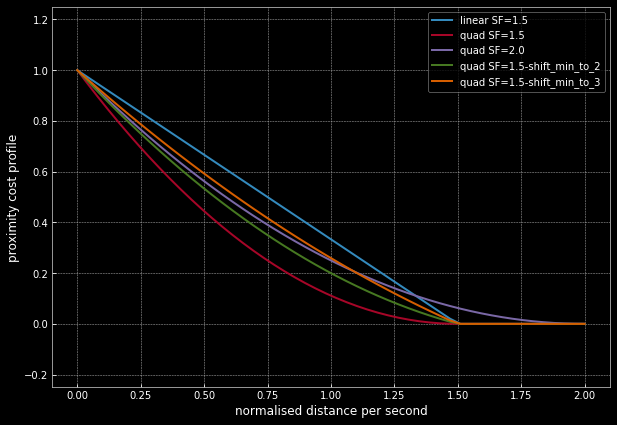

In [4]:
# Linear and quadratic proximity profile design
x = linspace(0, 2)
y = dict()
y['linear SF=1.5'] = maximum(1 - x / 1.5, 0)
y['quad SF=1.5'] = maximum((1 - x / 1.5), 0) ** 2
y['quad SF=2.0'] = (1 - x / 2.0) ** 2

# ✏️TODO: write function for analytical computation of shifts
quad_with_shift = get_quad_func(minima=2, zero_at=1.5)
y['quad SF=1.5-shift_min_to_2'] = maximum(quad_with_shift(x), 0)  # find correct values
quad_with_shift = get_quad_func(minima=3, zero_at=1.5)
y['quad SF=1.5-shift_min_to_3'] = maximum(quad_with_shift(x), 0)  # find correct values

for k in y: plot(x, y[k], label=k)

axis('equal')
legend()
xlabel('normalised distance per second')
ylabel('proximity cost profile')

In [5]:
def softmax(v, β=1):
    return log(sum(exp(β*v))) / β

In [6]:
import torch

Text(0, 0.5, '∂proximity_cost / ∂s')

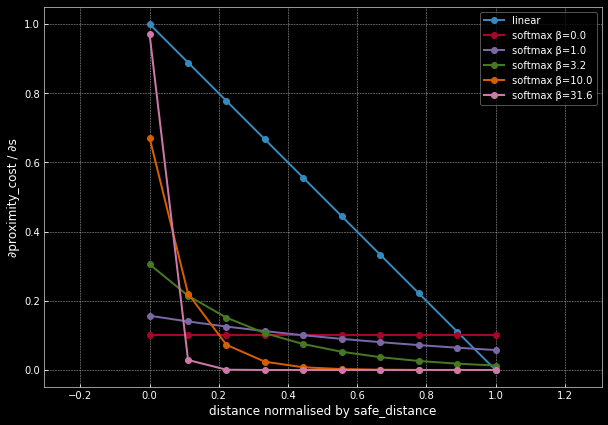

In [7]:
# Max, softmax, sum
x = torch.linspace(0, 1, 10, requires_grad=True)
y = dict()
c = 1 - x
y['linear'] = c
for e in range(-1, 4):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    y[f'softmax β={β:.1f}'] = torch.softmax(β * c, dim=0)

for k in y: plot(x.detach(), y[k].detach(), '-o', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')

Text(0, 0.5, '∂proximity_cost / ∂s')

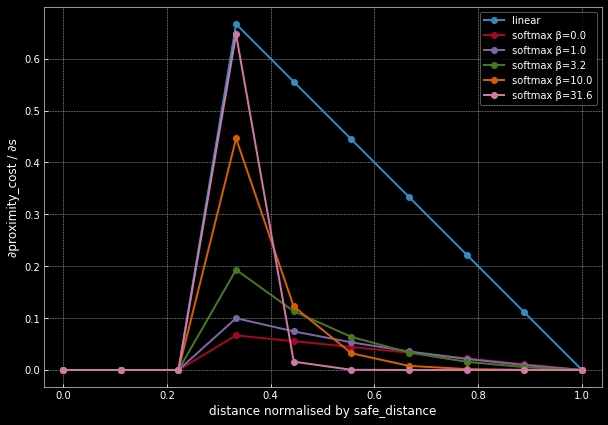

In [8]:
# Max, softmax, sum
x = torch.linspace(0, 1, 10, requires_grad=True)
y = dict()
c = 1 - x
c[:3] = 0
y['linear'] = c
for e in range(-1, 4):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    y[f'softmax β={β:.1f}'] = torch.softmax(β * c, dim=0) * c

for k in y: plot(x.detach(), y[k].detach(), '-o', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')

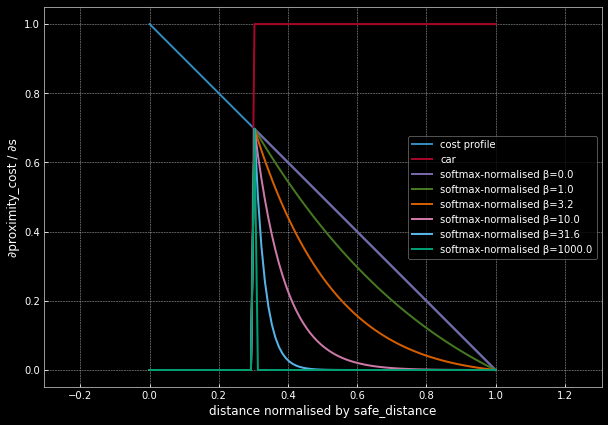

In [9]:
# Max, softmax, sum
N = 100
start = 30
x = torch.linspace(0, 1, N)
y = dict()
c = 1 - x
c[:start] = 0
y['cost profile'] = 1 - x
y['car'] = torch.zeros(N)
y['car'][start:] = 1
for e in range(-1, 5):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    if e == 4: β = 1e3
    sam = torch.softmax(β * c, dim=0)
    y[f'softmax-normalised β={β:.1f}'] = sam * c / max(sam)

for k in y: plot(x, y[k], '-', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')
savefig('normalised_attention.png')

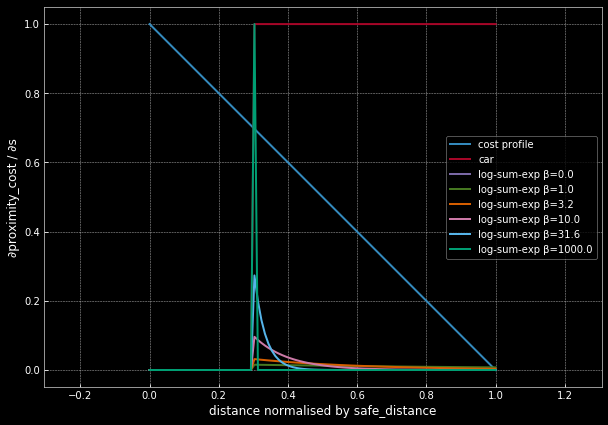

In [10]:
# Max, softmax, sum
N = 100
start = 30
x = torch.linspace(0, 1, N)
y = dict()
c = 1 - x
c[:start] = 0
y['cost profile'] = 1 - x
y['cost profile'].requires_grad = True
y['car'] = torch.zeros(N)
y['car'][start:] = 1
for e in range(-1, 5):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    if e == 4: β = 1e3
    
    cost = torch.logsumexp(β * y['cost profile'] * y['car'], dim=0 ) / β
    cost.backward()
    y[f'log-sum-exp β={β:.1f}'] = y['cost profile'].grad.clone()
    y['cost profile'].grad.zero_()

for k in y: 
    if hasattr(y[k],'grad'): y[k] = y[k].detach().numpy()
    plot(x, y[k], '-', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')
savefig('normalised_attention.png')

In [11]:
torch.softmax(torch.tensor(y['cost profile']), dim=0)

tensor([0.0158, 0.0156, 0.0155, 0.0153, 0.0152, 0.0150, 0.0149, 0.0147, 0.0146,
        0.0144, 0.0143, 0.0141, 0.0140, 0.0139, 0.0137, 0.0136, 0.0134, 0.0133,
        0.0132, 0.0130, 0.0129, 0.0128, 0.0127, 0.0125, 0.0124, 0.0123, 0.0122,
        0.0120, 0.0119, 0.0118, 0.0117, 0.0116, 0.0114, 0.0113, 0.0112, 0.0111,
        0.0110, 0.0109, 0.0108, 0.0107, 0.0106, 0.0104, 0.0103, 0.0102, 0.0101,
        0.0100, 0.0099, 0.0098, 0.0097, 0.0096, 0.0095, 0.0094, 0.0093, 0.0093,
        0.0092, 0.0091, 0.0090, 0.0089, 0.0088, 0.0087, 0.0086, 0.0085, 0.0085,
        0.0084, 0.0083, 0.0082, 0.0081, 0.0080, 0.0080, 0.0079, 0.0078, 0.0077,
        0.0076, 0.0076, 0.0075, 0.0074, 0.0073, 0.0073, 0.0072, 0.0071, 0.0070,
        0.0070, 0.0069, 0.0068, 0.0068, 0.0067, 0.0066, 0.0066, 0.0065, 0.0064,
        0.0064, 0.0063, 0.0062, 0.0062, 0.0061, 0.0061, 0.0060, 0.0059, 0.0059,
        0.0058])

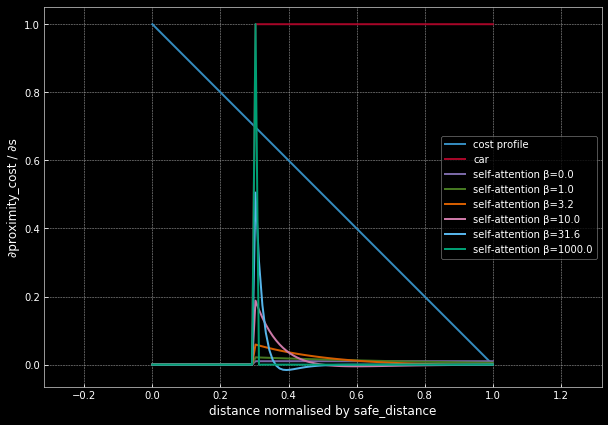

In [12]:
# Max, softmax, sum
N = 100
start = 30
x = torch.linspace(0, 1, N)
y = dict()
c = 1 - x
c[:start] = 0
y['cost profile'] = 1 - x
y['cost profile'].requires_grad = True
y['car'] = torch.zeros(N)
y['car'][start:] = 1
for e in range(-1, 5):
    β = 10 ** (e / 2)
    if e == -1: β = 0
    if e == 4: β = 1e3
    logit = y['cost profile'] * y['car']
    cost = torch.softmax(β *logit, dim=0)*logit 
    cost.sum().backward()
    y[f'self-attention β={β:.1f}'] = y['cost profile'].grad.clone()
    y['cost profile'].grad.zero_()

for k in y: 
    if hasattr(y[k],'grad'): y[k] = y[k].detach().numpy()
    plot(x, y[k], '-', label=k)

axis('equal')
legend()
xlabel('distance normalised by safe_distance')
ylabel('∂proximity_cost / ∂s')
savefig('normalised_attention.png')